In [15]:
%matplotlib inline
import numpy as np
import skimage.exposure as exposure
import matplotlib 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from snappy import ProductIO

In [12]:
## parameters
path_img = '/home/xin/Desktop/Sen-Tutorial/Sen-Snappy-Data/\
S1A_IW_GRDH_1SDV_20200315T102538_20200315T102603_031685_03A72D_EE8A.zip'
# path_oup = '/home/xin/Desktop/Sen-Tutorial/Sen-Snappy-Data/S1A_IW_GRDH_20200315T102538_03A72D_EE8A'
# list(product.getBandNames())

In [8]:
product = ProductIO.readProduct(path_img)
width = product.getSceneRasterWidth()
height = product.getSceneRasterHeight()
name = product.getName()
band_names = product.getBandNames()
# print(width,height,name,sep="\n")
# print(list(band_names))

16722 25648


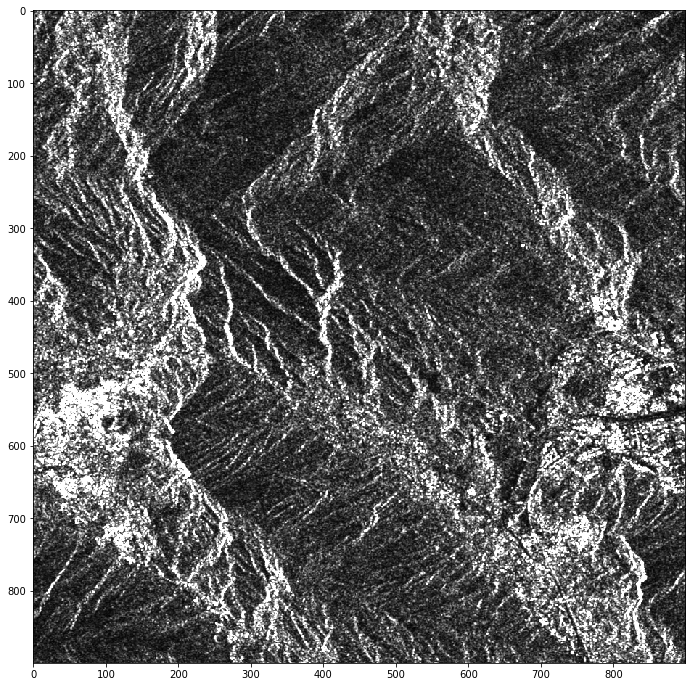

In [11]:
## image show
band_name='Intensity_VH'
band = product.getBand(band_name)
w = band.getRasterWidth()
h = band.getRasterHeight()
print(h,w)
band_data = np.zeros(w*h,np.float32)
band.readPixels(0,0,w,h,band_data)
band_data.shape = h, w
## Streching
val1,val2 = np.percentile(band_data, (2,98))  
band_data_new = exposure.rescale_intensity(band_data, in_range=(val1,val2)) ## image streching
plt.figure(figsize=(12,12))
plt.imshow(band_data_new,cmap = cm.gray)


In [18]:
# ProductIO.writeProduct(product, path_oup, 'GeoTIFF')
